In [3]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, classification_report

# Encode Categoric Variable

## Create DF from Dict

In [4]:
nama = ['Brian', 'Joe', 'Sarah', 'Julia']
gender = ['Male', 'Male', 'Female', 'Female']
martial = ['Married', 'Single', 'Married', 'Single']

In [5]:
my_dict = {'nama' : nama, 'gender': gender, 'martial': martial}

In [6]:
employee = pd.DataFrame(OrderedDict(my_dict))
employee

,nama,gender,martial
0,Brian,Male,Married
1,Joe,Male,Single
2,Sarah,Female,Married
3,Julia,Female,Single


In [7]:
employee2 = pd.get_dummies(employee, columns = ["gender", "martial"])
employee2

,nama,gender_Female,gender_Male,martial_Married,martial_Single
0,Brian,0,1,1,0
1,Joe,0,1,0,1
2,Sarah,1,0,1,0
3,Julia,1,0,0,1


In [8]:
employee3 = pd.get_dummies(employee, columns = ["gender", "martial"], drop_first=True)
employee3

,nama,gender_Male,martial_Single
0,Brian,1,0
1,Joe,1,1
2,Sarah,0,0
3,Julia,0,1


# Code 1

In [9]:
predicted = [1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
actual    = [1, 0, 1, 1, 0, 1, 1, 1, 0, 0]

In [10]:
my_dict = {'predicted' : predicted, 'actual' : actual}

In [11]:
predict = pd.DataFrame(OrderedDict(my_dict))

In [12]:
print(classification_report(actual, predicted))

             precision    recall  f1-score   support

          0       0.60      0.75      0.67         4
          1       0.80      0.67      0.73         6

avg / total       0.72      0.70      0.70        10



In [13]:
cm = confusion_matrix(actual, predicted)

In [14]:
cm

array([[3, 1],
       [2, 4]], dtype=int64)

In [15]:
total = sum(sum(cm))
total

10

In [16]:
accuracy = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
spesificity = cm[0,0] / (cm[0,0] + cm[0,1])

In [17]:
print("Confusion Matrix : \n", cm)
print("Accuracy : ", accuracy)
print("Sensitivity : ", sensitivity)
print("Spesificity : ", spesificity)

Confusion Matrix : 
 [[3 1]
 [2 4]]
Accuracy :  0.7
Sensitivity :  0.6666666666666666
Spesificity :  0.75


## Exercise


In [18]:
predicted2 = ['T', 'T', 'T', 'F', 'F', 'T', 'T', 'T', 'F', 'F']
actual2    = ['T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F']

In [19]:
my_dict1 = {'predicted' : predicted2, 'actual' : actual2}

In [20]:
predict1 = pd.DataFrame(OrderedDict(my_dict1))

In [21]:
predict3 = pd.get_dummies(predict1, columns = ["predicted", "actual"], drop_first=True)
predict3

,predicted_T,actual_T
0,1,1
1,1,1
2,1,0
3,0,0
4,0,0
5,1,1
6,1,1
7,1,0
8,0,0
9,0,0


In [22]:
print(classification_report(predict3['actual_T'], predict3['predicted_T']))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         6
          1       0.67      1.00      0.80         4

avg / total       0.87      0.80      0.80        10



In [23]:
cm = confusion_matrix(predict3['actual_T'], predict3['predicted_T'])

In [24]:
total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
spesificity = cm[0,0] / (cm[0,0] + cm[0,1])

In [25]:
print("Confusion Matrix : \n", cm)
print("Accuracy : ", accuracy)
print("Sensitivity : ", sensitivity)
print("Spesificity : ", spesificity)

Confusion Matrix : 
 [[4 2]
 [0 4]]
Accuracy :  0.8
Sensitivity :  1.0
Spesificity :  0.6666666666666666


In [26]:
%%markdown
# Excercise German Data Credit

# Excercise German Data Credit

In [27]:
training = pd.read_csv('training_german.csv')

In [28]:
testing = pd.read_csv('testing_german.csv')

In [29]:
training.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
0,1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
1,2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
2,3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
3,4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
4,5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [30]:
training.iloc[:, [1,5,6,7,8]].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,157608.781955,43.373955,50720.634827,48815.920662,46471.030556
std,124931.062684,8.777974,73365.449060,70753.129768,68182.984755
min,0.000000,20.000000,-165580.000000,-69777.000000,-61506.000000
25%,50000.000000,37.000000,3491.000000,2997.000000,2550.000000
50%,120000.000000,42.000000,21943.000000,20987.000000,19954.000000
75%,230000.000000,49.000000,65903.000000,62725.000000,59111.000000
max,800000.000000,72.000000,746814.000000,646770.000000,693131.000000


In [31]:
%%markdown
## Visualize Categorical Data

## Visualize Categorical Data

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
marriage = training.groupby('MARRIAGE').count().set_index(pd.Series(['Belum Menikah', 'Menikah', 'Lainnya']))

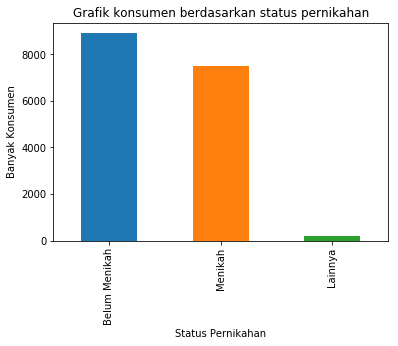

In [34]:
plt.title('Grafik konsumen berdasarkan status pernikahan')
plt.ylabel('Banyak Konsumen')
plt.xlabel('Status Pernikahan')
marriage['ID'].plot.bar()
plt.show()

In [35]:
sex = training.groupby('SEX').count().set_index(pd.Series(['Pria', 'Wanita']))
sex.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
Pria,6837,6837,6837,6837,6837,6837,6837,6837,6837
Wanita,9788,9788,9788,9788,9788,9788,9788,9788,9788


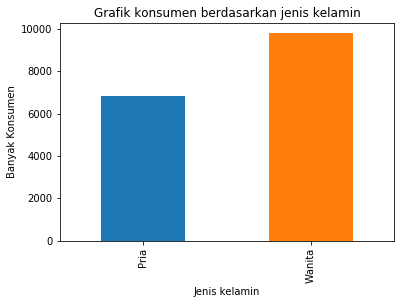

In [36]:
plt.title('Grafik konsumen berdasarkan jenis kelamin')
plt.ylabel('Banyak Konsumen')
plt.xlabel('Jenis kelamin')
sex['ID'].plot.bar()
plt.show()

In [37]:
edu = training.groupby('EDUCATION').count().set_index(pd.Series(['S2/S3', 'Dipl/S1', 'SMA', 'Lainnya']))
edu.head()

,ID,LIMIT_BAL,MARRIAGE,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
S2/S3,4029,4029,4029,4029,4029,4029,4029,4029,4029
Dipl/S1,6925,6925,6925,6925,6925,6925,6925,6925,6925
SMA,5359,5359,5359,5359,5359,5359,5359,5359,5359
Lainnya,312,312,312,312,312,312,312,312,312


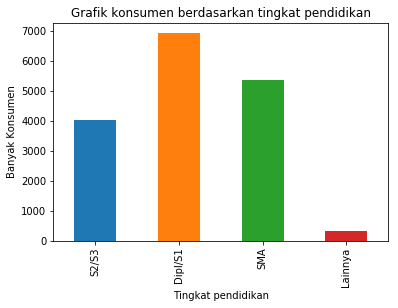

In [38]:
plt.title('Grafik konsumen berdasarkan tingkat pendidikan')
plt.ylabel('Banyak Konsumen')
plt.xlabel('Tingkat pendidikan')
edu['ID'].plot.bar()
plt.show()

In [39]:
target = training.groupby('TARGET').count().set_index(pd.Series(['Tidak Terlambat', 'Terlambat']))
target.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3
Tidak Terlambat,9989,9989,9989,9989,9989,9989,9989,9989,9989
Terlambat,6636,6636,6636,6636,6636,6636,6636,6636,6636


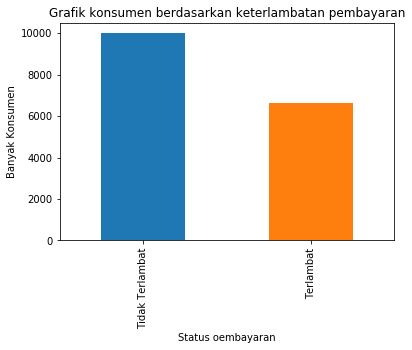

In [40]:
plt.title('Grafik konsumen berdasarkan keterlambatan pembayaran')
plt.ylabel('Banyak Konsumen')
plt.xlabel('Status oembayaran')
target['ID'].plot.bar()
plt.show()

In [41]:
%%markdown
## Visualize Numerical Data with Boxplot

## Visualize Numerical Data with Boxplot

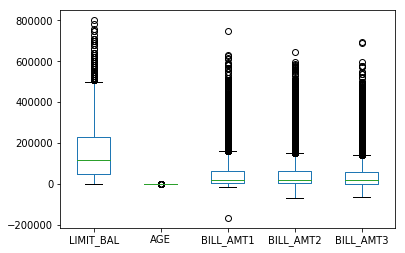

In [42]:
training.iloc[:, [1,5,6,7,8]].plot.box()

In [43]:
%%markdown
### Visualize boxplot per target

### Visualize boxplot per target

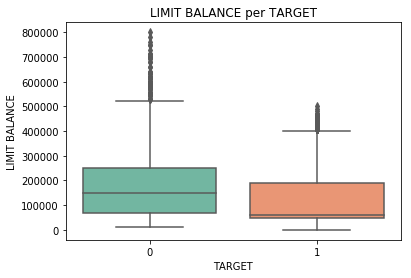

In [44]:
sns.boxplot(x = 'TARGET', y = 'LIMIT_BAL', data = training, palette = 'Set2')
plt.ylabel('LIMIT BALANCE')
plt.title('LIMIT BALANCE per TARGET')
plt.show()

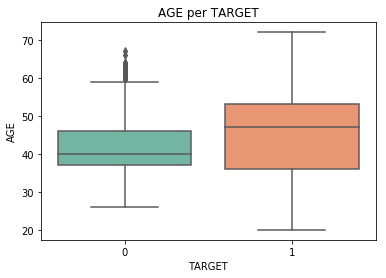

In [45]:
sns.boxplot(x = 'TARGET', y = 'AGE', data = training, palette = 'Set2')
plt.ylabel('AGE')
plt.title('AGE per TARGET')
plt.show()

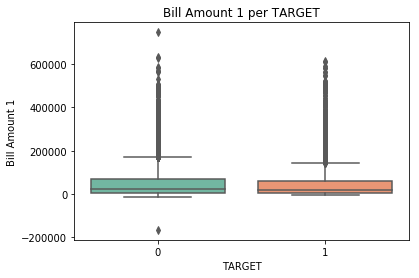

In [46]:
sns.boxplot(x = 'TARGET', y = 'BILL_AMT1', data = training, palette = 'Set2')
plt.ylabel('Bill Amount 1')
plt.title('Bill Amount 1 per TARGET')
plt.show()

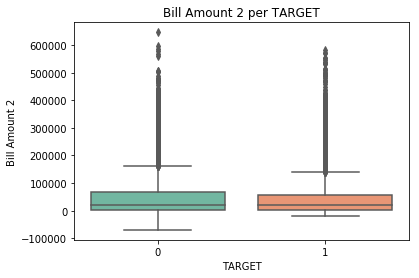

In [47]:
sns.boxplot(x = 'TARGET', y = 'BILL_AMT2', data = training, palette = 'Set2')
plt.ylabel('Bill Amount 2')
plt.title('Bill Amount 2 per TARGET')
plt.show()

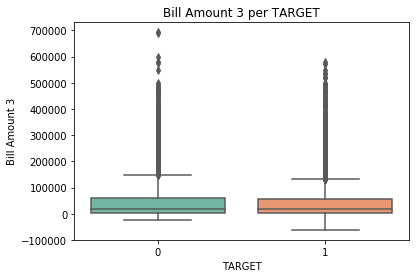

In [48]:
sns.boxplot(x = 'TARGET', y = 'BILL_AMT3', data = training, palette = 'Set2')
plt.ylabel('Bill Amount 3')
plt.title('Bill Amount 3 per TARGET')
plt.show()

In [49]:
%%markdown
## Visualize Correlation

## Visualize Correlation

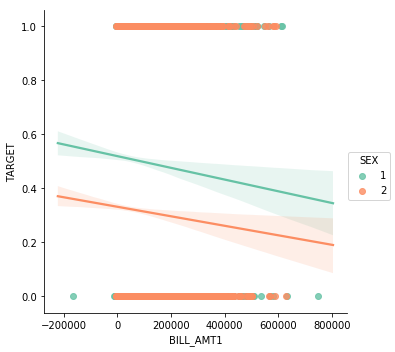

In [50]:
sns.lmplot(x='BILL_AMT1', y = 'TARGET', data = training, hue = 'SEX', palette = 'Set2')
plt.axis('tight')
plt.show()

In [51]:
%%markdown
## Handling Outlier

## Handling Outlier

In [53]:
desc = training.iloc[:, [1,5,6,7,8]].describe()

In [59]:
Q3 = desc.loc[['75%']]

In [61]:
Q1 = desc.loc[['25%']]

In [63]:
%%markdown
## Logistic Regression

## Logistic Regression

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
training1 = pd.get_dummies(training, columns = ["MARRIAGE", "EDUCATION", "SEX"], drop_first=True)

In [68]:
#split data into train and validation
X = training.drop(["ID", "TARGET"], 1)
Y = training["TARGET"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=17)

In [69]:
logreg = LogisticRegression(random_state=17)
logreg.fit(X_train, Y_train)
logregpred 